<a href="https://colab.research.google.com/github/Mejri1/Flower-Classification/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
image=[]
flower=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/flowerr/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/flowerr/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/flowerr/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/flowerr/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/flowerr/flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        image.append(np.array(img))
        flower.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(image))

100%|██████████| 764/764 [00:12<00:00, 60.10it/s] 

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(image))

100%|██████████| 490/490 [00:09<00:00, 49.75it/s] 

1254


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(image))

100%|██████████| 984/984 [00:23<00:00, 41.47it/s] 

2238


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(image))

100%|██████████| 1052/1052 [00:18<00:00, 57.85it/s] 

3290


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(image))

100%|██████████| 784/784 [00:13<00:00, 58.05it/s] 

4074


In [ ]:
import random

In [ ]:
def visualize_images(images, flowers):
    index = random.randint(0, len(images) - 1)

    random_image = images[index]
    flower_type = flowers[index]

    plt.imshow(random_image)
    plt.title(f'{flower_type} - Random Image')
    plt.axis('off')
    plt.show()


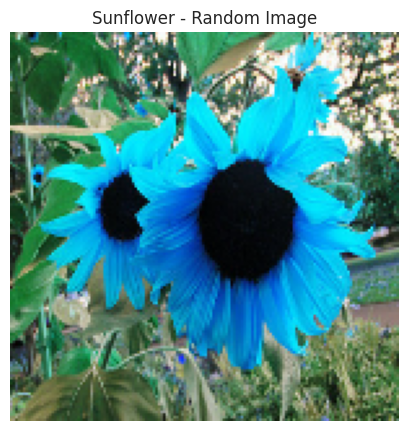

In [ ]:
visualize_images(image , flower)

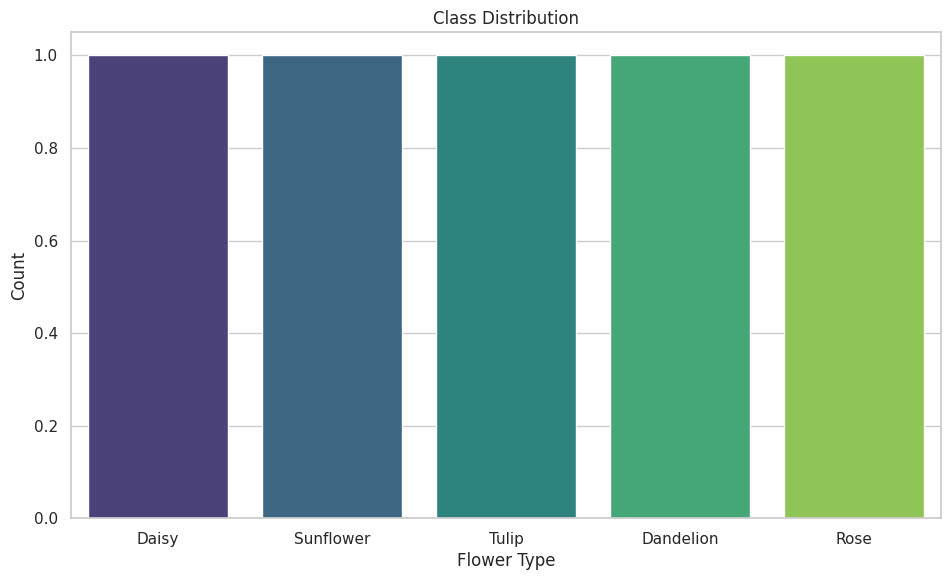

In [ ]:
from collections import Counter
flower_type_counts = Counter(flower)

plt.figure(figsize=(10, 6))
sns.countplot(x=list(flower_type_counts.keys()), order=list(flower_type_counts.keys()), palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Flower Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Encode the flower type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(flower)

In [ ]:
Y = to_categorical(Y , 5)

In [ ]:
image=np.array(image)
X=image/255

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# # modelling starts using a CNN.
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
import keras
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size=128
epochs=50

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(X_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

In [ ]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the model
model_path = '/content/drive/MyDrive/flowerr/your_model_and_weights_{epoch:02d}.h5'

# Define a ModelCheckpoint callback to save the model after each epoch
checkpoint = ModelCheckpoint(
    model_path,
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    period=1  # Save after each epoch
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fit the model using data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1,
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[checkpoint]
)

Epoch 1/50
25/25 [==============================] - 233s 9s/step - loss: 1.4008 - accuracy: 0.3999 - val_loss: 1.2109 - val_accuracy: 0.4883
Epoch 2/50
25/25 [==============================] - 226s 9s/step - loss: 1.1808 - accuracy: 0.5018 - val_loss: 1.1504 - val_accuracy: 0.5141
Epoch 3/50
25/25 [==============================] - 223s 9s/step - loss: 1.0887 - accuracy: 0.5407 - val_loss: 1.0447 - val_accuracy: 0.5656
Epoch 4/50
25/25 [==============================] - 223s 9s/step - loss: 1.0280 - accuracy: 0.5810 - val_loss: 0.9533 - val_accuracy: 0.6417
Epoch 5/50
25/25 [==============================] - 224s 9s/step - loss: 0.9741 - accuracy: 0.6008 - val_loss: 0.8799 - val_accuracy: 0.6699
Epoch 6/50
25/25 [==============================] - 227s 9s/step - loss: 0.9110 - accuracy: 0.6410 - val_loss: 1.0201 - val_accuracy: 0.5865
Epoch 7/50
25/25 [==============================] - 225s 9s/step - loss: 0.9071 - accuracy: 0.6416 - val_loss: 0.8554 - val_accuracy: 0.6638
Epoch 8/50
25

In [ ]:
print(history.history)

{'loss': [1.4007635116577148, 1.180820107460022, 1.0887318849563599, 1.0280014276504517, 0.9741025567054749, 0.9110091924667358, 0.9071480631828308, 0.848636269569397, 0.8422324657440186, 0.8084986209869385, 0.7828396558761597, 0.799078643321991, 0.7737210392951965, 0.7345053553581238, 0.7111236453056335, 0.6877253651618958, 0.6533908247947693, 0.6601612567901611, 0.6423473954200745, 0.630885124206543, 0.6046239137649536, 0.6050807237625122, 0.5800561308860779, 0.5788294672966003, 0.5943129658699036, 0.577636182308197, 0.5479738116264343, 0.5397047400474548, 0.4966125190258026, 0.4830527603626251, 0.5132626891136169, 0.47616317868232727, 0.4583113193511963, 0.4388252794742584, 0.4593043327331543, 0.44164738059043884, 0.4249444603919983, 0.3968941271305084, 0.4038517475128174, 0.41288888454437256, 0.38102635741233826, 0.3656785190105438, 0.34976905584335327, 0.3646492660045624, 0.34874239563941956, 0.3755081295967102, 0.32251423597335815, 0.35971131920814514, 0.31361863017082214, 0.3044

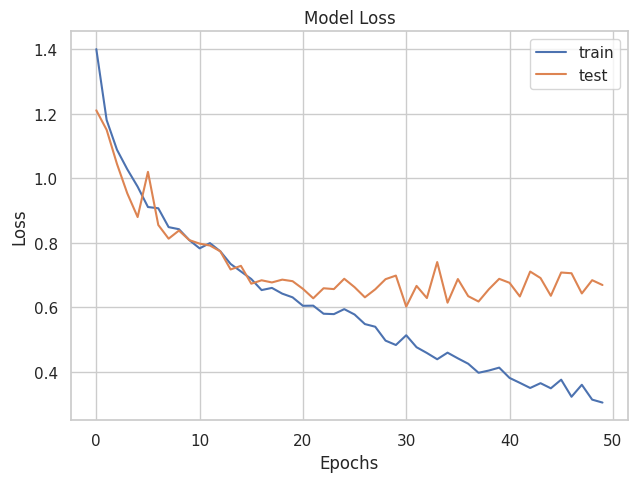

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

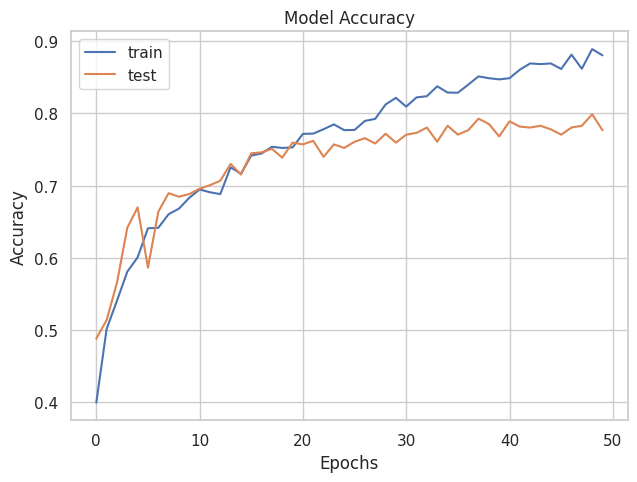

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to one-hot encoded labels
y_pred = np.zeros_like(y_pred_prob)
y_pred[np.arange(len(y_pred_prob)), y_pred_prob.argmax(axis=1)] = 1

# Convert true labels to one-hot encoded labels if needed
y_true = np.zeros_like(y_test)
y_true[np.arange(len(y_test)), y_test.argmax(axis=1)] = 1

# Get class labels
class_labels = [str(i) for i in range(y_true.shape[1])]

# Calculate confusion matrix
cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

26/26 [==============================] - 20s 759ms/step


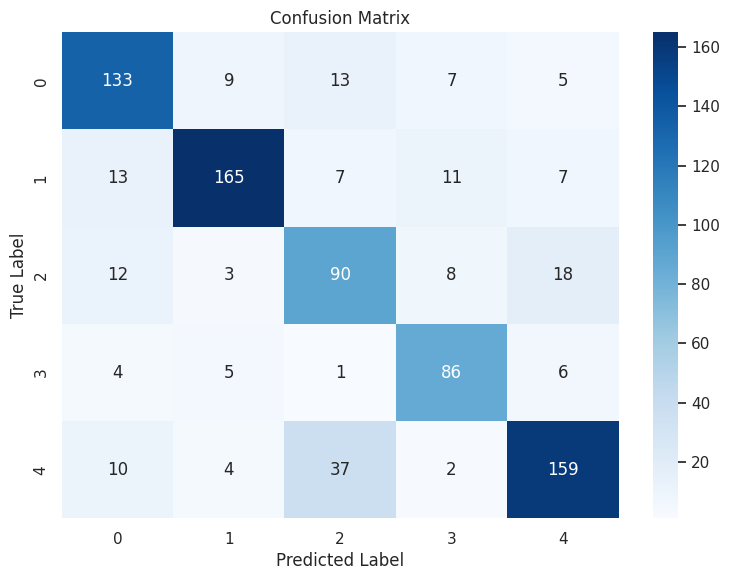

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are your true and predicted labels
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 77.67%


1/1 [==============================] - 0s 176ms/step


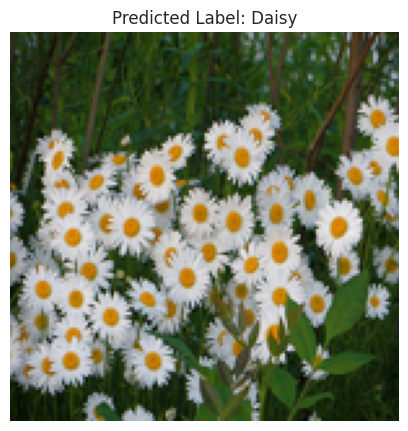

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/flowerr/flowers/daisy/8983779970_9d3a6a3bf2_n.jpg'
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((150, 150))

# Convert to NumPy array
image_array = np.array(resized_image)

# Expand dimensions if needed
image_array = np.expand_dims(image_array, axis=0)

# Predict using the model (replace 'model' with your actual Keras model)
prediction = model.predict(image_array)

# Get the predicted label
predicted_label_index  = np.argmax(prediction)

predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

# Display the image and predicted label
plt.imshow(resized_image)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
